In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()
print(x.shape)
print(y.shape)

(50,)
(50,)


In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)
yy = np.array([0,0,1,1,2,2,3,3,4,5])
k_ind = build_k_indices(yy, 4, 1)
k_ind

array([[2, 9],
       [6, 4],
       [0, 3],
       [1, 7]])

In [4]:
from costs import compute_mse
from costs import compute_loss
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    loss_tr, loss_te = 0.0, 0.0
    for fold in range(0, k):
        # ***************************************************
        # get k'th subgroup in test, others in train
        # ***************************************************
        y_test, y_train, x_test, x_train = np.array([]), np.array([]), np.array([]), np.array([])
        for row in k_indices:
            x_temp, y_temp = np.array([]), np.array([])
            kth_subgroup = k_indices[k_indices.shape[0]-1-fold]

            for j in np.nditer(row):
                x_temp = np.append(x_temp, x[j])
                y_temp = np.append(y_temp, y[j])
            
            if  np.array_equal(row, kth_subgroup):
                x_test = np.append(x_test, x_temp)
                y_test = np.append(y_test, y_temp)
            else:
                x_train = np.append(x_train, x_temp)
                y_train = np.append(y_train, y_temp)


        # ***************************************************
        # form data with polynomial degree
        # ***************************************************
        train_phi = build_poly(x_train, degree)
        test_phi = build_poly(x_test, degree)

        # ***************************************************
        # ridge regression: TODO
        # ***************************************************
        train_mse, train_weight = ridge_regression(y_train, train_phi, lambda_)

        # ***************************************************
        # calculate the loss for train and test data
        # ***************************************************
        test_mse = compute_loss(y_test, test_phi, train_weight)
        loss_tr += np.sqrt(2*train_mse)
        loss_te += np.sqrt(2*test_mse)
        
    return loss_tr/k, loss_te/k

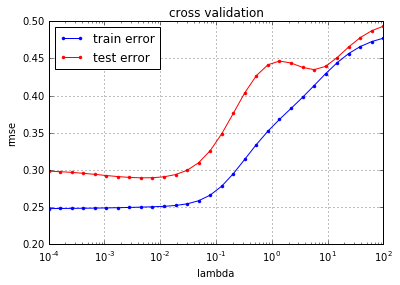

In [5]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 2, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # cross validation
    # ***************************************************   
    for lambd in np.nditer(lambdas):
        loss_tr, loss_te = cross_validation(y, x, k_indices, k_fold, lambd, degree)
        rmse_tr = np.append(rmse_tr, loss_tr)
        rmse_te = np.append(rmse_te, loss_te)
    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

/Users/mateusz/Dropbox/EPFL/Semester I/Machnie Learning CS-433/My Answers/MachineLearning/Labs/ex04/template/split_data.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  training_x = shuffled_x[0:test_x_size]
/Users/mateusz/Dropbox/EPFL/Semester I/Machnie Learning CS-433/My Answers/MachineLearning/Labs/ex04/template/split_data.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  test_x = shuffled_x[-test_x_size:]
/Users/mateusz/Dropbox/EPFL/Semester I/Machnie Learning CS-433/My Answers/MachineLearning/Labs/ex04/template/split_data.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  training_y = shuffled_y[0:test_y_size]
/Users/mateusz/Dropbox/EPFL/Semester I/Machnie Learning CS-433/My Answers/MachineLearning/Labs/ex04/template/split_data.py:25: VisibleDeprecationWarning: usin

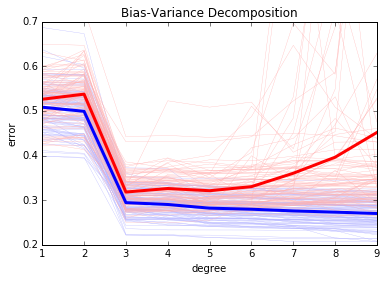

In [6]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization
from costs import compute_loss

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        s = np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # split data with a specific seed
        # ***************************************************
        train_x, test_x, train_y, test_y = split_data(x, y, ratio_train, seed)
        # ***************************************************
        # bias_variance_decomposition
        # ***************************************************
        for index_degree, degree in enumerate(degrees):
            train_phi = build_poly(train_x, degree)
            test_phi = build_poly(test_x, degree)
            train_mse, train_weight = least_squares(train_y, train_phi)
            test_mse = compute_loss(test_y, test_phi, train_weight)
            tr_rmse = np.sqrt(2*train_mse)
            te_rmse = np.sqrt(2*test_mse)
            rmse_tr[index_seed, index_degree] = tr_rmse
            rmse_te[index_seed, index_degree] = te_rmse

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()